In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

#Installing pmdarima package
get_ipython().system(' pip install pmdarima')

# Importing auto_arima 
from pmdarima.arima import auto_arima

In [ ]:
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2021-12-23 14:17:10--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2021-12-23 14:17:10--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8301933597ad9d0981dbbbab96.dl.dropboxusercontent.com/cd/0/inline/Bcah4pnkOLS6iawg5uSqLvSf96-V0JTY1xxFCSOiFRG5fKwvZxjiZVvMfBB93sJ8MYQYCpXpmxzftj4aQTiPyRABk4qHeNGJJoC5IKCVO8pVtyty_m292-WhLEPNZsgpXuli-sX8gWsnUAZxGNIy_tRn/file# [following]
--2021-12-23 14:17:11--  https://uc8301933597ad9d0981dbbbab96.dl.dropboxusercontent.com/cd/0/inline/Bcah4pnkOLS6iawg5uSqLvSf96-V0JTY1xxFCSOiFRG5fKwvZxjiZVvMfBB93sJ8MY

In [ ]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]
df

/content


,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [ ]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones
dftemp

,date,freq
0,2015-01-01 00:13:00,1
1,2015-01-01 00:16:00,1
2,2015-01-01 00:48:00,1
3,2015-01-01 00:56:00,1
4,2015-01-01 01:04:00,1
...,...,...
24085,2017-12-31 17:14:00,1
24086,2017-12-31 18:40:00,1
24087,2017-12-31 20:09:00,1
24088,2017-12-31 20:44:00,1


In [ ]:
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
#dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
#dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()
dftempweek

,freq
date,
2015-01-04,117
2015-01-11,163
2015-01-18,141
2015-01-25,210
2015-02-01,174
...,...
2017-12-03,125
2017-12-10,109
2017-12-17,105


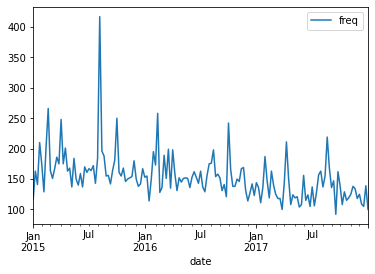

In [ ]:
#Read the sales dataset
sales_data = dftempweek

sales_data.head()

#Make sure there are no null values at the end of the dataset
sales_data.tail()

#Check the datatypes
sales_data.dtypes

# To understand the pattern
sales_data.plot()

In [ ]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [ ]:
#Spliting the dataset into train and test
train = sales_data[:104]
test = sales_data[-52:]
train.tail()

,freq
date,
2016-11-27,131
2016-12-04,114
2016-12-11,127
2016-12-18,142
2016-12-25,123


In [ ]:
test.head()

,freq
date,
2017-01-08,136
2017-01-15,111
2017-01-22,136
2017-01-29,187
2017-02-05,147


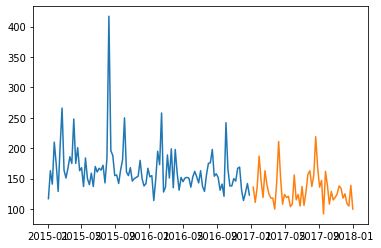

In [ ]:
plt.plot(train)
plt.plot(test)

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=10, max_q=10, start_P=0, 
                          D=1, start_Q=0, max_P=10, max_D=10,
                          max_Q=10, m=4, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1128.986, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1074.617, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1112.758, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=1065.236, Time=0.13 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=1062.262, Time=0.33 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=1060.522, Time=0.41 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=1056.235, Time=0.44 sec
 ARIMA(1,1,0)(6,1,0)[4]             : AIC=1058.057, Time=0.66 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=1054.094, Time=3.38 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=1.73 sec
 ARIMA(1,1,0)(6,1,1)[4]             : AIC=1055.047, Time=4.73 sec
 ARIMA(1,1,0)(5,1,2)[4]             : AIC=1055.431, Time=6.16 sec
 ARIMA(1,1,0)(4,1,2)[4]             : AIC=inf, Time=4.40 sec
 ARIMA(1,1,0)(6,1,2)[4]             : AIC=inf, T

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  104
Model:             SARIMAX(2, 1, 0)x(5, 1, [1], 4)   Log Likelihood                -514.438
Date:                             Thu, 23 Dec 2021   AIC                           1046.876
Time:                                     14:18:14   BIC                           1070.232
Sample:                                          0   HQIC                          1056.326
                                             - 104                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5385      0.090     -5.955      0.000      -0.716      -0.361
ar.L2         -0.3048      0.085     -3.570      0.000      -0.472      -0.137
ar.S.L4       -0.2638      0.183     -1.438      0.150      -0.623       0.096
ar.S.L8       -0.0892      0.153     -0.582      0.561      -0.390       0.211
ar.S.L12      -0.0985      0.155     -0.637      0.524      -0.402       0.205
ar.S.L16      -0.0711      0.169     -0.421      0.674      -0.402       0.260
ar.S.L20      -0.0257      0.168     -0.153      0.878      -0.354       0.303
ma.S.L4       -0.8424      0.126     -6.691      0.000      -1.089      -0.596
sigma2      1751.9381    182.743      9.587      0.000    1393.769    2110.107
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):               152.17
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
date,
2017-01-08,124.173055
2017-01-15,126.810742
2017-01-22,123.394328
2017-01-29,135.943160
2017-02-05,119.684101
2017-02-12,119.358101
2017-02-19,123.768683
2017-02-26,133.840340
2017-03-05,117.578785


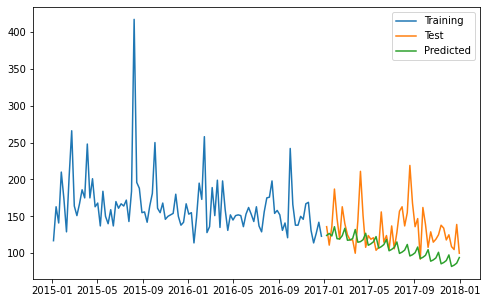

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
from sklearn import metrics
from math import sqrt
test['predicted_sales'] = prediction
r2 = metrics.r2_score(test['freq'], test['predicted_sales'])
mse = metrics.mean_squared_error(test['freq'], test['predicted_sales'])
rmse = sqrt(mse)
mae = metrics.mean_absolute_error(test['freq'], test['predicted_sales'])
mape = metrics.mean_absolute_percentage_error(test['freq'], test['predicted_sales'])

print('R2=', r2, 'MSE=', mse, 'RMSE=', rmse, 'MAE=', mae, 'MAPE=', mape)

R2= -1.118416456133522 MSE= 1436.9005726807206 RMSE= 37.90647138261119 MAE= 28.42712295558306 MAPE= 0.19506392645921283
